In [1]:
'''ST10134058 Shivam Mayur Pillay PDAN8412 Part 1'''
print()

In [2]:
'''
The Data set is from Maranhão (2021) titled Steam Reviews
The download link is: https://www.kaggle.com/datasets/andrewmvd/steam-reviews/download?datasetVersionNumber=3
'''
print()

In [3]:
'''
It is important to first understand what a Neural Network is. Neural Networks are similar to the brain of a human which can learn from its mistakes, 
they are made up of 3 different types of layers made up of interconnected nodes within each layer (IBM Cloud Education, 2020). The first layer type is 
the referred to as the input layer with one or multiple nodes which then feed into the next layer (IBM Cloud Education, 2020). From one layer to the 
next weights and biases are included when data moves from one node to the next (IBM Cloud Education, 2020). These weights and biases are adjusted in 
each iteration (epoch) as the model tries to improve itself. According to IBM Cloud Education (2020 The next layer is referred to as the hidden layer, 
this layer performs the calculations required to make the prediction. It should be noted that there can be multiple hidden layers feeding from one 
layer to the next. The last layer is referred to as the output layer (IBM Cloud Education, 2020).  

As per Biswal (2022) type of Neural Network is the Recurrent Neural Network (RNN) which makes use of feedback loops where outcomes of previous 
observations are used to model the outcomes of future observations. In traditional neural networks the calculations of all inputs are independent of 
the outputs previous observations (Biswal, 2022). Hence when training the model, the RNN remembers the outcomes from previous observations to enhance 
the training/predictability of the model. RNN’s are best used when faced with data which is sequential in nature such as stock price prediction or 
text natural language processing (Biswal, 2022). 

Within each node an activation function is included. Activation functions such as sigmoid, relu, tanh and more are the tools used to perform calculations 
within the nodes (Jain, 2019). The improvements in the predictability of the model is determined by the learning rate (Biswal, 2022). The model would adjust 
its calculations based on the error or cost function which is the difference between the predicted value and the actual value in training (IBM Cloud Education, 2020). 
The larger the error the larger the change (or the larger the step) the model would make to adjust the predictions to get closer to the correct answer (Biswal, 2022).

The RNN model suffers from the vanishing gradient problem where continuous learning is not possible eventually because the learning steps taken become so small 
they have no meaningful impact on the models performance (Biswal, 2022). To mitigate this issue an LSTM layer is added into the RNN model to act as a forget gate 
of irrelevant information which prevents the model from improving its prediction performance (Biswal, 2022). 
'''

print()

In [4]:
''' 
According to Chaudhuri (2022) sentiment analysis falls within natural language processing (NLP) in machine learning, it determines the tone behind the text. 
More specifically in the steam reviews used we are determining if a review is negative or positive. As per Thomas (2019) an RNN is best suited to NLP due 
to its ability to understand sequences. Words have set definitions in a dictionary but the order and combination with other words you use them with can 
have an impact on the sentiment of a sentence. Therefore, based on this the RNN model, or more specifically the LSTM model, is best suited for NLP. 
The LSTM layer added to the RNN model assists in the vanishing gradient problem discussed by Biswal (2022). As per the example Chaudhuri (2022) provided, 
the data set does require some processing which means the words need to be converted into a numerical format it can understand and learn from. 
'''
print()

In [5]:
''' 
Firstly, the data set will be loaded and assessed as is, we will then drop columns which will not aid in creating the model for prediction. Next the all of the 
null values will be filled or removed, it will then be possible to see how many negative and positive observations are in the data set. We will then extract an 
even number of observations from each category. Thereafter the data will be cleaned and inspected removing stop words and punctuations and adjusting the inflection 
of each word using the lemmatization functions. A word cloud will be created to visualize how often each word is used in each sentiment.

At this point the words will all be converted into an index of words, each unique word representing a number. Each row is then padded with the number 0 so that each 
observation has the same number of words in each array. The data will then be split into training and testing data. 

At this point the RNN (LSTM) model will be built with layers (input, hidden and output). The model will then be trained and tested. The model will then be adjusted 
where necessary to achieve the most accurate model possible.

The overall objective of this model is to have the ability to predict when a body of text which is a review about one of the games on steam is positive or negative.  
'''
print()

In [6]:
# This is to supress some of the warnings that may appear in the outputs of cells

import warnings
warnings.filterwarnings("ignore")

# (Python Software Foundation, 2009)

In [7]:
# Import the CSV file using Pandas

import pandas as pd

pd.options.display.max_colwidth = 5000

df = pd.read_csv('dataset.csv')

# (Refsnes Data, 2022)

In [8]:
# Show the first 5 observations 

df.head()

# (Refsnes Data, 2022)

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,"This will be more of a ''my experience with this game'' type of review, because saying things like ''great gameplay'' will not suit something I've experienced with Counter-Strike. Here you go: I remember back in 2002 I was at a friend's house and he was playing a game. I didn't know the name of the game nor I had internet to find it. A few weeks passed by and another friend came over. He didn't have a computer, so he brought a disc with a game in it. He told me that it was one of the best games and from that very moment I knew that it is going to be the game I saw at the other friend's house. When I saw the Counter-Strike logo I was filled with gamegasm (?) and I was so happy. I was playing it hardcore. Made friends, clans, was involved in communities and even made two myself. Counter-Strike is my first game which I played competitively and it was a such an experience. Playing public servers with mods were very fun, but playing it competitively made it very intense and stressful. In a pleasant way, ofcourse. Looking at the current e-sport scene it might not seem like much but back then it was different. Shooters these days try to be different, advanced in a way. Sometimes the most simple games like Counter-Strike are the ones that live to this day. Also, there are plenty of mods to keep your attention to this game. The gameplay is very simple - defend as a Counter-Terrorist, attack as a Terrorist to plant the bomb or save the hostages as a CT. I am sure most of you already know this and I doubt there are gamers that haven't heard or know the gameplay of Counter-Strike, so I am sharing here more of my experience. I wish I could find my CS Anthology account which I've lost since 2008. So, I decided I am going to buy this game again and here you go - more than a thousand hours played. I still play it from time to time to this day and it brings back many great memories and I sometimes even stumble upon people I've played with years ago. I think Counter-Strike changed gaming in a major way and we wouldn't have many games like we have today, if this game wouldn't exist. I am sure many of people already have played games like CS:GO but never the roots. I doubt any of you will play it for more than an hour, because it's much more simple and it differs a lot in my opinion from CS:GO and modern games. It's harder though.",1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like games that don't lag? • Do you like games you can run on low end PC's? • Do you like games where you don't meet children who have slept with your mother? Then this is for you!,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [9]:
# Based on what can be seen above only the review score and text is needed for this analysis

df=df[['review_score','review_text']]

df.head(1)

# (Refsnes Data, 2022)

,review_score,review_text
0,1,Ruined my life.


In [10]:
# Rename the columns to shorter names to make it easier when coding

df=df.rename(columns={"review_score": "score", "review_text": "text"})
df.head(1)

# (Refsnes Data, 2022)

,score,text
0,1,Ruined my life.


In [11]:
'''
Check the number of observations (6417106) and the data type
Both data types are suited for the intended analysis
'''

df.info()

# (Refsnes Data, 2022)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   score   int64 
 1   text    object
dtypes: int64(1), object(1)
memory usage: 97.9+ MB


In [12]:
# Show a count of the number of null values in each column

print('Score Nulls: ',df['score'].isna().sum())
print('Text Nulls: ',df['text'].isna().sum())

# (Refsnes Data, 2022)

Score Nulls:  0
Text Nulls:  7305


In [13]:
# Drop the null values in text column

df=df.dropna()
print('Score Nulls: ',df['score'].isna().sum())
print('Text Nulls: ',df['text'].isna().sum())

# (Refsnes Data, 2022)

Score Nulls:  0
Text Nulls:  0


<AxesSubplot:xlabel='score', ylabel='count'>

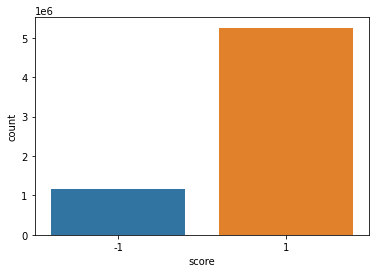

In [14]:
# Plot the number of positive an negative reviews using Seaborn

import seaborn as sns

sns.countplot(df['score'])

# (Seaborn 2012)

# NB** reduce sample size below to reduce training time 

In [15]:
'''
Due to the time it would take to train take an smaller subset of dataframe
Ensure an even number of positive and negative sentiment is used by including 'groupby'
"n=x" below within the sample function will take an x amount from each sentiment
'''

df=df.groupby('score').sample(n=100000)

# (Refsnes Data, 2022)

In [16]:
# Show that an even number of scores are taken for each sentiment 

df["score"].value_counts()

-1    100000
 1    100000
Name: score, dtype: int64

In [17]:
# Show the number of observations 1st then the number of variables (Columns)

df.shape

# (The Pandas Development Team, 2022)

(200000, 2)

In [18]:
'''
Download stopword list and add words onto that list
These words are removed due to them not adding value to the models ability to make a prediction
'''

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stopword_list = stopwords.words('english')

print(stopword_list)

# (tutorialspoint, 2022)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df.head()

,score,text
1425933,-1,Early Access Review
1383956,-1,Early Access Review
1074525,-1,"The game itself is pretty cool, I'd like to play it more often, if the support and the servers weren't so non-functional. If I would've paid for this game I'd be livid at the incompetence in bringing this game forth to be actually playable. Just got it and for 2 days some patch was making the game unplayable. Once it's announced it's 'fixed' it still doesn't work. I've played other free games before but never anything at this low level of support. I can't really call it a waste of HDD space, because I actually like the game. I just imagine support is being run by 10 year olds."
5963129,-1,It's ok.
1097431,-1,"It's a good game with some small flaws but the real issue is the people in charge of it. For two weeks they had an event that was advertised as upcoming free content. Except it was the complete opposite, they introduced PAY TO WIN microtransactions instead of free content. They have a long history of shady business practices but I always looked the other way because it was a good game. It's not good enough to justify the things they're trying to pull now. There's already over a hundred dollars of DLC and they added P2W microtransactions on top of it, claiming it would be free content. They have absolutely no integrity and you should avoid buying anything related to overkill and starbreeze."


In [20]:
# Remove stopwords and visually compare the previous output to the current one to see if the change has been made

def remove_stopwords(text):
    tokens = [token.strip() for token in word_tokenize(text)]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['text'] = df['text'].apply(remove_stopwords)
df.head()

# (tutorialspoint, 2022)

,score,text
1425933,-1,Early Access Review
1383956,-1,Early Access Review
1074525,-1,"game pretty cool , 'd like play often , support servers n't non-functional . would 've paid game 'd livid incompetence bringing game forth actually playable . got 2 days patch making game unplayable . 's announced 's 'fixed ' still n't work . 've played free games never anything low level support . ca n't really call waste HDD space , actually like game . imagine support run 10 year olds ."
5963129,-1,'s ok .
1097431,-1,"'s good game small flaws real issue people charge . two weeks event advertised upcoming free content . Except complete opposite , introduced PAY WIN microtransactions instead free content . long history shady business practices always looked way good game . 's good enough justify things 're trying pull . 's already hundred dollars DLC added P2W microtransactions top , claiming would free content . absolutely integrity avoid buying anything related overkill starbreeze ."


In [21]:
# Remove special characters and numbers as they do not aid in prediction

import re

def remove_spec_char(textsc):
        return re.sub(r"[^a-zA-Z]+", ' ', textsc)
df["text"] = df["text"].apply(remove_spec_char)
df.head()

# (Python Software Foundation, 2009a)

,score,text
1425933,-1,Early Access Review
1383956,-1,Early Access Review
1074525,-1,game pretty cool d like play often support servers n t non functional would ve paid game d livid incompetence bringing game forth actually playable got days patch making game unplayable s announced s fixed still n t work ve played free games never anything low level support ca n t really call waste HDD space actually like game imagine support run year olds
5963129,-1,s ok
1097431,-1,s good game small flaws real issue people charge two weeks event advertised upcoming free content Except complete opposite introduced PAY WIN microtransactions instead free content long history shady business practices always looked way good game s good enough justify things re trying pull s already hundred dollars DLC added P W microtransactions top claiming would free content absolutely integrity avoid buying anything related overkill starbreeze


In [22]:
# Set everything to lower case to make it easier for the model

df['text'] = df['text'].str.lower()

df.head()

# (Kumar, 2022)

,score,text
1425933,-1,early access review
1383956,-1,early access review
1074525,-1,game pretty cool d like play often support servers n t non functional would ve paid game d livid incompetence bringing game forth actually playable got days patch making game unplayable s announced s fixed still n t work ve played free games never anything low level support ca n t really call waste hdd space actually like game imagine support run year olds
5963129,-1,s ok
1097431,-1,s good game small flaws real issue people charge two weeks event advertised upcoming free content except complete opposite introduced pay win microtransactions instead free content long history shady business practices always looked way good game s good enough justify things re trying pull s already hundred dollars dlc added p w microtransactions top claiming would free content absolutely integrity avoid buying anything related overkill starbreeze


In [23]:
# Convert all types of inflected words to the base word using lemmatization like the word programs to program

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
w_Lemma = WordNetLemmatizer()

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    textlemmaed=[w_Lemma.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    filtered_text = ' '.join(textlemmaed)
    return filtered_text

df['text'] = df['text'].apply(lemmatize_text)
df.head()

# (Jabeen 2018)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,score,text
1425933,-1,early access review
1383956,-1,early access review
1074525,-1,game pretty cool d like play often support server n t non functional would ve paid game d livid incompetence bringing game forth actually playable got day patch making game unplayable s announced s fixed still n t work ve played free game never anything low level support ca n t really call waste hdd space actually like game imagine support run year old
5963129,-1,s ok
1097431,-1,s good game small flaw real issue people charge two week event advertised upcoming free content except complete opposite introduced pay win microtransactions instead free content long history shady business practice always looked way good game s good enough justify thing re trying pull s already hundred dollar dlc added p w microtransactions top claiming would free content absolutely integrity avoid buying anything related overkill starbreeze


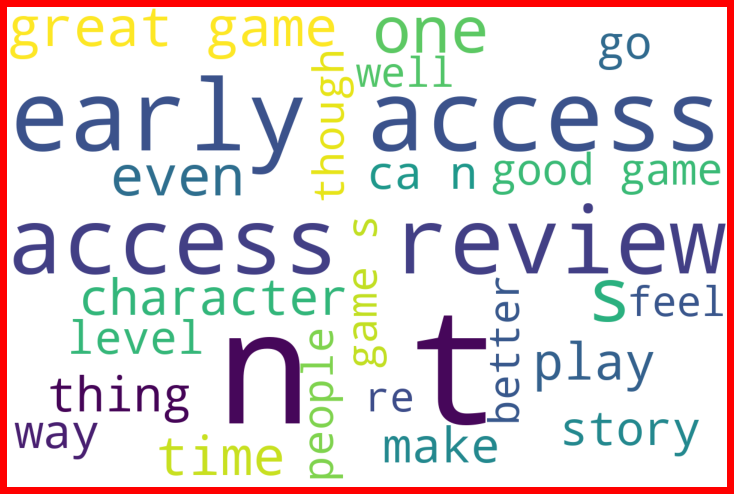

In [24]:
# show the most comman positive wors used

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive=df['text'][df['score']==1]
pos_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(positive))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(pos_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

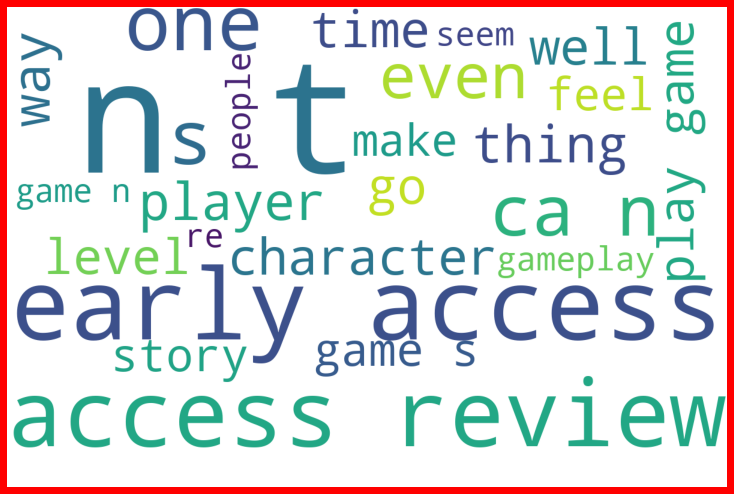

In [25]:
# Most comman negative words

negative=df['text'][df['score']==-1]
neg_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(negative))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(neg_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

In [26]:
# Show the average lenght of each column

df['length']=df['text'].str.len()

print(df.groupby('score').mean())



          length
score           
-1     235.33511
 1     178.39507


In [27]:
# Find the average length of a text string and then round that number off

AvLength=round(df['length'].mean())
print(AvLength)

207


In [28]:
# Drop the lenght column 

df = df[['score','text']]

# (Refsnes Data 2022)

# NB** The _*2*_ cells below are to assist in tunning, by reloading the data at this stage I am able to avoid any cache effect from previous training 

In [29]:
OGcopy=df.copy()

In [69]:
df=OGcopy.copy()

In [70]:
# Using Tensorflow tokenize the most common words and then put them into a an array for each observation

from tensorflow.keras.preprocessing.text import Tokenizer

maxWords=10000

# Tokenize our data
tokenizer = Tokenizer(num_words=maxWords, oov_token = '<UNK>')
tokenizer.fit_on_texts(df['text'])

# Encode training data sentences into sequences
df['text'] = tokenizer.texts_to_sequences(df['text'])

# (TensorFlow Development Team, 2022)

In [71]:
df.head()

,score,text
1425933,-1,"[13, 15, 9]"
1383956,-1,"[13, 15, 9]"
1074525,-1,"[2, 59, 211, 86, 6, 8, 355, 261, 186, 5, 4, 561, 2797, 18, 45, 541, 2, 86, 1, 7820, 2370, 2, 1967, 97, 726, 52, 124, 353, 194, 2, 514, 3, 3243, 3, 397, 28, 5, 4, 63, 45, 26, 89, 2, 75, 130, 338, 44, 261, 54, 5, 4, 14, 388, 247, 5912, 250, 97, 6, 2, 1089, 261, 84, 111, 135]"
5963129,-1,"[3, 329]"
1097431,-1,"[3, 12, 2, 319, 770, 138, 114, 43, 1405, 132, 654, 570, 2833, 3897, 89, 191, 474, 251, 2425, 1937, 158, 241, 812, 192, 89, 191, 107, 1061, 5013, 1631, 1523, 172, 803, 25, 12, 2, 3, 12, 102, 2568, 23, 46, 165, 1186, 3, 228, 1004, 531, 133, 505, 181, 1033, 812, 323, 5378, 18, 89, 191, 306, 5667, 520, 286, 130, 1972, 878, 7368]"


In [72]:
'''
Now you need to pad the sequences so that they are all the same size when being fed into the model to make them all uniform for 
training/building
Padding is done are the end of the arrays
'''

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded=pad_sequences(df['text'], value=0.0, padding='post', truncating='post', maxlen=50)

# (TensorFlow Development Team, 2022)

In [73]:
print("\nPadded training shape:", padded.shape)
print("\nPadded training sequences:\n", padded)


Padded training shape: (200000, 50)

Padded training sequences:
 [[  13   15    9 ...    0    0    0]
 [  13   15    9 ...    0    0    0]
 [   2   59  211 ...  261   54    5]
 ...
 [   5    4   71 ...  192 3982   44]
 [   3    2  245 ...    0    0    0]
 [  11  755    2 ...    0    0    0]]


In [74]:
# From Sklearn import train test split to split our data

from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['score']).values

X_train, X_test, Y_train, Y_test = train_test_split(padded,Y, test_size = 0.25, random_state = 42, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

# (Scikit-learn Developers, 2022)

(150000, 50) (150000, 2)
(50000, 50) (50000, 2)


In [75]:
''' 
The last dense layer is considered as the output layer, 
Use a learning rate of 0.001 to train the model
A summary of the model is printed below 
Use a output_dim of 50 (dimension embedding) 
'''
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

model =Sequential()

model.add(Embedding(maxWords,50,input_length = padded.shape[1]))

model.add(LSTM(100,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics = ['accuracy'])

#print(model.summary())

# (Keras Team, 2022)

In [76]:
model.fit(X_train, Y_train, epochs = 3, verbose = 1)

# (Keras Team, 2022)

Epoch 1/3
4688/4688 [==============================] - 137s 29ms/step - loss: 8681.7549 - accuracy: 0.5608
Epoch 2/3
4688/4688 [==============================] - 140s 30ms/step - loss: 17774.3301 - accuracy: 0.5530
Epoch 3/3
4688/4688 [==============================] - 147s 31ms/step - loss: 0.6726 - accuracy: 0.5646


In [77]:
'''
The test result in this  round of evaluation showed the testing score accuracy was almost 5% below the training score
NB* everytime the model is run the scores are different as the neural network starts training at a random number
Since the test score is almost 5% lower than the training score it show the model is overfit (adjust later)
'''

model.evaluate(x=X_test,y=Y_test)

# (Keras Team, 2022)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.6810 - accuracy: 0.5562


[0.6809538006782532, 0.5562199950218201]

In [78]:
'''
Use "Adam" to adjust the learning rate. Adam is an optimizer which would be able to determine the correct rate
Add/Change: drop out layers, add more layers, different activation functions
The output layer should only have 2 nodes as the output can only be positive or negative and this works best with 'softmax'
'softmax' as activation function helps the model determin if it is that node or not  
change output_dim to 100
'''

from keras.layers import Dropout

model2 =Sequential()

model2.add(Embedding(maxWords,100,input_length = padded.shape[1]))

model2.add(LSTM(100,activation='tanh', recurrent_activation="sigmoid", return_sequences=True))
model2.add(Dropout(0.1))
model2.add(LSTM(100,activation='tanh', recurrent_activation="sigmoid", return_sequences=False))
model2.add(Dense(2,activation='softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

#print(model2.summary())

# (Keras Team, 2022)

In [79]:
'''
To address the overfitting issue
Split the training data even furthere into training and valdation sets, the Validation set will let the model know how well the 
build is generalizing on the training data and make adjustments as per the validation results
'''

model2.fit(X_train, Y_train, epochs = 3, validation_split=0.25, verbose = 1)

# (Keras Team, 2022)

Epoch 1/3
3516/3516 [==============================] - 245s 69ms/step - loss: 0.4906 - accuracy: 0.7409 - val_loss: 0.4433 - val_accuracy: 0.7765
Epoch 2/3
3516/3516 [==============================] - 244s 69ms/step - loss: 0.4189 - accuracy: 0.7853 - val_loss: 0.4473 - val_accuracy: 0.7784
Epoch 3/3
3516/3516 [==============================] - 252s 72ms/step - loss: 0.3874 - accuracy: 0.8001 - val_loss: 0.4405 - val_accuracy: 0.7617


In [80]:
model2.evaluate(x=X_test,y=Y_test)

# (Keras Team, 2022)

1563/1563 [==============================] - 29s 19ms/step - loss: 0.4436 - accuracy: 0.7620


[0.4436292052268982, 0.7619600296020508]

In [81]:
''' 
To further avoid overfitting include an early stop funtion which monitors the validation accuracy after 1 epoch
Will restore to best weights
'''
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)

# (Keras Team, 2022)

In [82]:
# I will increas the number of iterations the model build on to 5 epochs 


history=model2.fit(X_train, Y_train, validation_split=0.25, epochs = 5, callbacks=[callback], verbose = 1)

# (Keras Team, 2022)

Epoch 1/5
3516/3516 [==============================] - 244s 69ms/step - loss: 0.3633 - accuracy: 0.8102 - val_loss: 0.4496 - val_accuracy: 0.7769
Epoch 2/5
3516/3516 [==============================] - 245s 70ms/step - loss: 0.3368 - accuracy: 0.8233 - val_loss: 0.4684 - val_accuracy: 0.7766


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


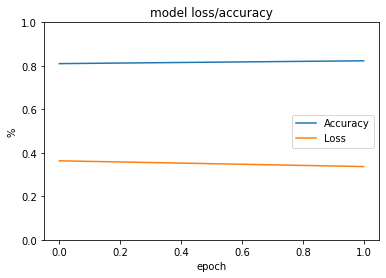

In [83]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model loss/accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='right')
plt.ylim(0, 1)
plt.show()

# (Brownlee, 2016)

In [84]:
model2.evaluate(x=X_test,y=Y_test)

# (Keras Team, 2022)

1563/1563 [==============================] - 27s 17ms/step - loss: 0.4526 - accuracy: 0.7752


[0.452605664730072, 0.775160014629364]

In [85]:
'''
The improvement made was marginal 
Had there been more processing power I would have increased: 
1.) the number of observations 
2.) the number of epochs to build the model
3.) output_dim at the embedding stage  

How to adjust the earlystopping will be determined on how the above changes would perform
'''
print()

In [86]:
'''   
Reference list 

Biswal, A. (2022) Recurrent Neural Network (RNN) Tutorial: Types and Examples [Updated] | Simplilearn. [Online]. 11 August 2022. Available at: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn#what_is_a_recurrent_neural_network_rnn (Accessed: 10 September 2022).

Brownlee, J. (2016) Display Deep Learning Model Training History in Keras. [Online]. 16 June 2016. Available at: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ (Accessed: 8 September 2022).

Chaudhuri, K.D. (2022) Sentiment Analysis with LSTM. [Online]. 15 March 2022. Available at: https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/ (Accessed: 10 September 2022).

IBM Cloud Education (2020) What are Neural Networks? [Online]. 17 August 2020. Available at: https://www.ibm.com/cloud/learn/neural-networks (Accessed: 10 September 2022).

Jabeen, H. (2018) Stemming and Lemmatization in Python. [Online]. 23 October 2018. Available at: https://www.datacamp.com/tutorial/stemming-lemmatization-python (Accessed: 3 September 2022).

Jain, V. (2019) Everything you need to know about ‘Activation Functions’ in Deep learning models. [Online]. 30 December 2019. Available at: https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253 (Accessed: 10 September 2022).

Keras Team (2022) Keras documentation: Keras API reference. [Online]. 2022. Available at: https://keras.io/api/ (Accessed: 6 September 2022).

Kumar, G.S. (2022) Convert Column Values to Lowercase in Pandas Dataframe – thisPointer. [Online]. 2022. Available at: https://thispointer.com/convert-column-values-to-lowercase-in-pandas-dataframe/ (Accessed: 3 September 2022).

Maranhão, A. (2021) Steam Reviews. [Online]. November 2021. Available at: https://www.kaggle.com/datasets/andrewmvd/steam-reviews (Accessed: 15 August 2022).

Python Software Foundation (2009) Python 3.7.2 documentation. [Online]. 2009. Available at: https://www.python.org/ (Accessed: 3 September 2022).

Refsnes Data (2022) Learn Python. [Online]. 2022. Available at: https://www.w3schools.com/python/default.asp (Accessed: 10 September 2022).

Scikit-learn Developers (2022) scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [Online]. 2022. Available at: https://scikit-learn.org/stable/index.html (Accessed: 8 September 2022).

Seaborn (2012) seaborn: statistical data visualization — seaborn 0.9.0 documentation. [Online]. 2012. Available at: https://seaborn.pydata.org/ (Accessed: 8 September 2022).

TensorFlow Development Team (2022) Module: tf | TensorFlow Core v2.4.1. [Online]. 2022. Available at: https://www.tensorflow.org/api_docs/python/tf (Accessed: 8 September 2022).

The Pandas Development Team (2022) Pandas Documentation. [Online]. 6 April 2022. Available at: https://pandas.pydata.org/docs/index.html (Accessed: 10 September 2022).

Thomas, C. (2019) Recurrent Neural Networks and Natural Language Processing. [Online]. 9 June 2019. Available at: https://towardsdatascience.com/recurrent-neural-networks-and-natural-language-processing-73af640c2aa1 (Accessed: 10 September 2022).

tutorialspoint (2022) Python - Remove Stopwords - Tutorialspoint. [Online]. 2022. Available at: https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm#:~:text=Stopwords%20are%20the%20English%20words (Accessed: 10 September 2022).

Vu, D. (2019) Python Word Clouds Tutorial: How to Create a Word Cloud. [Online]. 8 November 2019. Available at: https://www.datacamp.com/tutorial/wordcloud-python (Accessed: 10 September 2022).

'''
print()